# PANORAMA IMAGE WITH AFFINE TRANSFORMATION

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image_filenames=[]
for i in range(1,37):
    img =  f"D:/computer vision/puzzles/puzzle_affine_8/pieces/piece_{i}.jpg"
    image_filenames.append(img)
images = [cv2.imread(filename) for filename in image_filenames]

'''
Here's how Load the images works:

A list called image_filenames is created and initialized as an empty list.

A loop is run 36 times (because we have 36 images inside the pieces folder), with i taking on the values from 1 to 36.

Inside the loop, a string called img is created using an f-string. The f-string contains the path to an image file, with {i} used as a placeholder for the value of the loop variable.

The string img is appended to the list image_filenames.

After the loop completes, a list comprehension is used to load each image file in image_filenames using the cv2.imread function. The loaded images are stored in a list called images.

So, at the end of this code, images is a list of 36 images loaded from the image files specified in image_filenames.

'''


# Create a SIFT object 
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for each image
keypoints_list = []
descriptors_list = []
for image in images:
    keypoints, descriptors = sift.detectAndCompute(image, None)
    keypoints_list.append(keypoints)
    descriptors_list.append(descriptors)

# Create a feature matcher
matcher = cv2.FlannBasedMatcher_create()

# Match keypoints and descriptors between adjacent images with ratio test
matches_list = []
for i in range(len(images)-1):
    matches = matcher.knnMatch(descriptors_list[i], descriptors_list[i+1], k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good_matches.append(m)
    matches_list.append(good_matches)

# Apply RANSAC to estimate the affine transformation between matched keypoints
homography_list = []
for matches, keypoints1, keypoints2 in zip(matches_list, keypoints_list[:-1], keypoints_list[1:]):
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    M, mask = cv2.estimateAffine2D(src_pts, dst_pts, ransacReprojThreshold=5.0)
    homography_list.append(M)

# Warp the images to align with the first image
height, width = images[0].shape[:2]
warped_images = []
for i in range(len(images)):
    if i == 0:
        warped_images.append(images[i])
    else:
        warped_img = cv2.warpAffine(images[i], homography_list[i-1], (width*(i+1), height))
        warped_images.append(warped_img)

# Combine the images into a panorama
panorama = np.zeros((height, width*(len(images)+1), 3), dtype=np.uint8)
panorama[:, :width] = warped_images[0]
for i in range(1, len(warped_images)):
    panorama[:, i*width:(i+1)*width] = warped_images[i][:, :width]
cv2.imwrite('panor_affine.jpg', panorama)
# Display the panorama
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.show()


ModuleNotFoundError: No module named 'cv2'

# PANORAMA IMAGE WITH HOMOGRAPHY

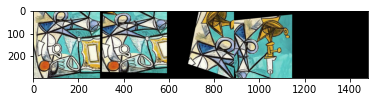

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image_filenames=[]
for i in range(1,5):
    img =  f"C:/Users/user/Downloads/ex1/puzzles/puzzles/puzzle_homography_1/pieces/piece_{i}.jpg"
    image_filenames.append(img)
images = [cv2.imread(filename) for filename in image_filenames]

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for each image
keypoints_list = []
descriptors_list = []
for image in images:
    keypoints, descriptors = sift.detectAndCompute(image, None)
    keypoints_list.append(keypoints)
    descriptors_list.append(descriptors)

# Create a feature matcher
matcher = cv2.FlannBasedMatcher_create()

# Match keypoints and descriptors between adjacent images
# matches_list = []
# for i in range(len(images)-1):
#     matches = matcher.match(descriptors_list[i], descriptors_list[i+1])
#     matches_list.append(matches)
matches_list = []
for i in range(len(images)-1):
    matches = matcher.knnMatch(descriptors_list[i], descriptors_list[i+1], k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good_matches.append(m)
    matches_list.append(good_matches)

# Apply RANSAC to estimate the homography transformation between matched keypoints
homography_list = []
for matches, keypoints1, keypoints2 in zip(matches_list, keypoints_list[:-1], keypoints_list[1:]):
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    homography_list.append(M)

# Warp the images to align with the first image
height, width = images[0].shape[:2]
warped_images = []
for i in range(len(images)):
    if i == 0:
        warped_images.append(images[i])
    else:
        warped_img = cv2.warpPerspective(images[i], homography_list[i-1], (width*(i+1), height))
        warped_images.append(warped_img)

# Combine the images into a panorama
panorama = np.zeros((height, width*(len(images)+1), 3), dtype=np.uint8)
panorama[:, :width] = warped_images[0]
for i in range(1, len(warped_images)):
    panorama[:, i*width:(i+1)*width] = warped_images[i][:, :width]
cv2.imwrite('panoramao_homo.jpg', panorama)
# Display the panorama
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.show()


Creating a planar panorama can be memory intensive because the process involves loading multiple images, detecting and matching keypoints between them, estimating the affine transformations to align them, and finally combining the images into a single panorama. Depending on the size and number of images, this process can require a significant amount of memory.

In addition, when multiple images are combined into a panorama, the size of the resulting image can become very large, which requires even more memory to store. If the system running the code does not have enough memory to handle the large images, the code may crash due to an out-of-memory error.

# HOMOGRAPHY  With Planar Panorama

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image_filenames=[]
for i in range(1,5):
    img =  f"C:/Users/user/Downloads/ex1/puzzles/puzzles/puzzle_homography_1/pieces/piece_{i}.jpg"
    image_filenames.append(img)

images = [cv2.imread(filename) for filename in image_filenames]

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for each image
keypoints_list = [sift.detectAndCompute(image, None) for image in images]

# Create a feature matcher
matcher = cv2.BFMatcher()

# Match keypoints and descriptors between adjacent images
matches_list = []
# for i in range(len(images)-1):
#     matches = matcher.match(keypoints_list[i][1], keypoints_list[i+1][1])
#     matches_list.append(matches)
matches_list = []
for i in range(len(images)-1):
    matches = matcher.knnMatch(descriptors_list[i], descriptors_list[i+1], k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good_matches.append(m)
    matches_list.append(good_matches)

# Apply RANSAC to estimate the homography transformation between matched keypoints
homography_list = []
for matches, keypoints1, keypoints2 in zip(matches_list, keypoints_list[:-1], keypoints_list[1:]):
    src_pts = np.float32([keypoints1[0][m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[0][m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    homography_list.append(M)

# Stitch the images together using OpenCV's stitcher
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

# Display the stitched image
#plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
plt.show()

# Save the stitched image
cv2.imwrite('panorma.jpg', stitched)


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\ocl.cpp:5954: error: (-220:Unknown error code -220) OpenCL error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4) during call: clEnqueueReadBuffer(q, handle=00000261B4E86620, CL_TRUE, 0, sz=1887905880, data=00000262B7782080, 0, 0, 0) in function 'cv::ocl::OpenCLAllocator::map'


# DIFFERENCE BETWEEN HOMOGRAPHY AND AFFINE TRANSFORMATION

For geometric transformations, computer vision employs both affine transformations and homography. They differ, nevertheless, in terms of the kinds of alterations they may depict as well as their inherent characteristics.

A 2D transformation that keeps parallelism and the ratios of distances between points is known as an affine transformation. In other words, it can skew, scale, translate, and rotate a picture, but not more intricate operations like perspective distortion.


The 3x3 transformation matrix known as homography, on the other hand, can describe projective transformations like perspective distortion. It is capable of carrying out all affine transformations and can simulate the impact of viewing an object from various angles, such as in a camera image.

In terms of application, affine transformation is often used for simple image transformations such as cropping, resizing, and rotation. Homography is commonly used in image stitching, where multiple images are combined to create a panoramic view or 3D reconstruction of a scene.

To summarise, affine transformation is a simpler transformation that can perform rotation, translation, scaling, and skewing, while homography is a more complex transformation that can handle perspective distortion and is useful in image stitching and 3D reconstruction.

# AFFINE  With Planar Panorama

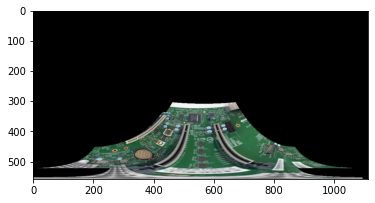

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image_filenames=[]
for i in range(1,3):
    img =  f"C:/Users/user/Downloads/ex1/puzzles/puzzles/puzzle_affine_1/pieces/piece_{i}.jpg"
    image_filenames.append(img)

images = [cv2.imread(filename) for filename in image_filenames]

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for each image
keypoints_list = [sift.detectAndCompute(image, None) for image in images]

# Create a feature matcher
matcher = cv2.BFMatcher()

# Match keypoints and descriptors between adjacent images
# matches_list = []
# for i in range(len(images)-1):
#     matches = matcher.match(keypoints_list[i][1], keypoints_list[i+1][1])
#     matches_list.append(matches)
matches_list = []
for i in range(len(images)-1):
    matches = matcher.knnMatch(descriptors_list[i], descriptors_list[i+1], k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good_matches.append(m)
    matches_list.append(good_matches)

# Apply RANSAC to estimate the affine transformation between matched keypoints
affine_list = []
for matches, keypoints1, keypoints2 in zip(matches_list, keypoints_list[:-1], keypoints_list[1:]):
    src_pts = np.float32([keypoints1[0][m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[0][m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    M, mask = cv2.estimateAffine2D(src_pts, dst_pts)
    affine_list.append(M)

# Stitch the images together using OpenCV's stitcher
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

# Display the stitched image
plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
plt.show()

# Save the stitched image
cv2.imwrite('panorama_planar.jpg', stitched)


# JUST FOR UNDERSTANDING

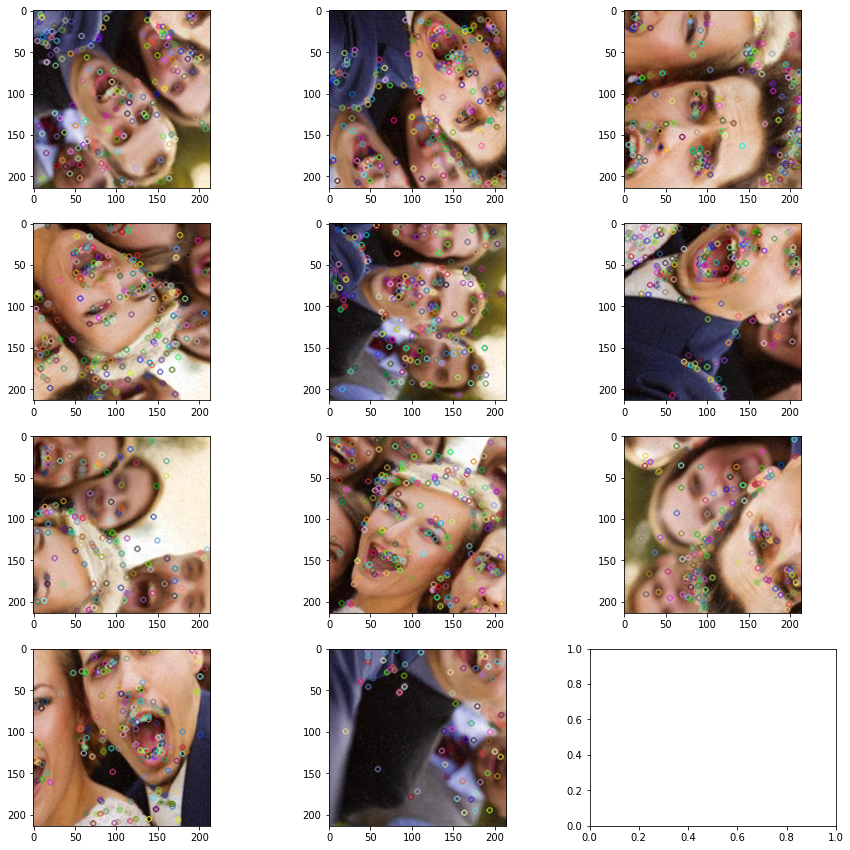

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define the SIFT object
sift = cv2.SIFT_create()

# Create a figure with 3 columns and 4 rows
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Loop through the images
for i in range(1, 12):
    # Load the image
    img = cv2.imread(f"C:/Users/user/Downloads/ex1/puzzles/puzzles/puzzle_affine_4/pieces/piece_{i}.jpg")
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply SIFT on the grayscale image
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    # Display the keypoints on the original image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)
    # Plot the image in the corresponding subplot
    axs[(i-1)//3, (i-1)%3].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))

# Show the figure
plt.show()
